## About Dataset

Context:
This synthetic healthcare dataset has been created to serve as a valuable resource for data science, machine learning, and data analysis enthusiasts. It is designed to mimic real-world healthcare data, enabling users to practice, develop, and showcase their data manipulation and analysis skills in the context of the healthcare industry.

Inspiration:
The inspiration behind this dataset is rooted in the need for practical and diverse healthcare data for educational and research purposes. Healthcare data is often sensitive and subject to privacy regulations, making it challenging to access for learning and experimentation. To address this gap, I have leveraged Python's Faker library to generate a dataset that mirrors the structure and attributes commonly found in healthcare records. By providing this synthetic data, I hope to foster innovation, learning, and knowledge sharing in the healthcare analytics domain.

Dataset Information:
Each column provides specific information about the patient, their admission, and the healthcare services provided, making this dataset suitable for various data analysis and modeling tasks in the healthcare domain. Here's a brief explanation of each column in the dataset -

Name: This column represents the name of the patient associated with the healthcare record.

Age: The age of the patient at the time of admission, expressed in years.

Gender: Indicates the gender of the patient, either "Male" or "Female."

Blood Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).

Medical Condition: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.

Date of Admission: The date on which the patient was admitted to the healthcare facility.

Doctor: The name of the doctor responsible for the patient's care during their admission.

Hospital: Identifies the healthcare facility or hospital where the patient was admitted.

Insurance Provider: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."

Billing Amount: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.

Room Number: The room number where the patient was accommodated during their admission.

Admission Type: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.

Discharge Date: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.

Medication: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."

Test Results: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.

### Target Column => Medical Condition
### condition_mapping = {
    0: 'Arthritis',
    1: 'Asthma',
    2: 'Cancer',
    3: 'Diabetes',
    4: 'HyperTension',
    5: 'Obesity'
}

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler


import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [2]:
df = pd.read_csv("health.csv")

In [3]:
df.head(100)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,cathERinE gArDnEr,79,Female,A-,Hypertension,2019-08-19,David Ruiz,James Ltd,Medicare,25503.673807,144,Elective,2019-08-26,Lipitor,Abnormal
96,ANNE THOMPSoN,76,Female,O+,Diabetes,2024-03-24,Kyle Smith,Kemp-Munoz,Aetna,6312.607691,226,Elective,2024-04-14,Aspirin,Abnormal
97,TOdd coopeR,55,Female,A+,Diabetes,2022-12-10,Jason Price,Henderson-Taylor,UnitedHealthcare,21772.341399,459,Elective,2022-12-31,Ibuprofen,Normal
98,PhILLIP lyOnS,53,Male,B-,Cancer,2022-09-14,Stephanie Clements,"Parsons, Hartman Martinez and",Blue Cross,30437.001788,208,Elective,2022-09-18,Aspirin,Normal


In [61]:
df.head(100)

,Age,Medical Condition,Billing Amount,Days hospitalized,Gender_targuided,Blood Type_targuided,Doctor_targuided,Admission Type_targuided,Medication_targuided,Test Results_targuided
0,0.223684,2,0.380933,0.034483,1.0,0.857143,0.509817,0.0,0.00,1.0
1,0.644737,5,0.650904,0.172414,1.0,1.000000,0.958329,1.0,1.00,0.5
2,0.828947,5,0.547053,0.482759,0.0,0.571429,0.866733,1.0,0.25,1.0
3,0.197368,3,0.728798,1.000000,0.0,0.000000,0.635350,0.5,1.00,0.0
4,0.394737,2,0.296622,0.655172,0.0,0.714286,0.326624,0.0,0.50,0.0
...,...,...,...,...,...,...,...,...,...,...
95,0.868421,4,0.502296,0.206897,0.0,0.571429,0.849405,0.5,0.75,0.0
96,0.828947,3,0.151920,0.689655,0.0,0.000000,0.497942,0.5,0.25,0.0
97,0.552632,3,0.434173,0.689655,0.0,1.000000,0.621319,0.5,1.00,1.0
98,0.526316,2,0.592365,0.103448,1.0,0.857143,0.381656,0.5,0.25,1.0


In [ ]:
2->cancer
5-> obesity
3-> diabetes
4-> HyperTension
1-> Asthama
0->Arthritis

In [4]:
df.shape

(55500, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

## Checking Null Values

In [6]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [7]:
# Converting to date-time type
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                55500 non-null  object        
 1   Age                 55500 non-null  int64         
 2   Gender              55500 non-null  object        
 3   Blood Type          55500 non-null  object        
 4   Medical Condition   55500 non-null  object        
 5   Date of Admission   55500 non-null  datetime64[ns]
 6   Doctor              55500 non-null  object        
 7   Hospital            55500 non-null  object        
 8   Insurance Provider  55500 non-null  object        
 9   Billing Amount      55500 non-null  float64       
 10  Room Number         55500 non-null  int64         
 11  Admission Type      55500 non-null  object        
 12  Discharge Date      55500 non-null  datetime64[ns]
 13  Medication          55500 non-null  object    

In [9]:
df.describe().round(2)

,Age,Date of Admission,Billing Amount,Room Number,Discharge Date
count,55500.00,55500,55500.00,55500.00,55500
mean,51.54,2021-11-01 01:02:22.443243008,25539.32,301.13,2021-11-16 13:15:20.821621504
min,13.00,2019-05-08 00:00:00,-2008.49,101.00,2019-05-09 00:00:00
25%,35.00,2020-07-28 00:00:00,13241.22,202.00,2020-08-12 00:00:00
50%,52.00,2021-11-01 00:00:00,25538.07,302.00,2021-11-17 00:00:00
75%,68.00,2023-02-03 00:00:00,37820.51,401.00,2023-02-18 00:00:00
max,89.00,2024-05-07 00:00:00,52764.28,500.00,2024-06-06 00:00:00
std,19.60,NaN,14211.45,115.24,NaN


In [10]:
# Describing Object datatype elements
df.describe(include= "object").T

,count,unique,top,freq
Name,55500,49992,DAvId muNoZ,3
Gender,55500,2,Male,27774
Blood Type,55500,8,A-,6969
Medical Condition,55500,6,Arthritis,9308
Doctor,55500,40341,Michael Smith,27
Hospital,55500,39876,LLC Smith,44
Insurance Provider,55500,5,Cigna,11249
Admission Type,55500,3,Elective,18655
Medication,55500,5,Lipitor,11140
Test Results,55500,3,Abnormal,18627


In [11]:
df['Medical Condition'].value_counts()

Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64

In [12]:
df['Gender'].value_counts()

Gender
Male      27774
Female    27726
Name: count, dtype: int64

In [13]:
df['Blood Type'].value_counts()

Blood Type
A-     6969
A+     6956
AB+    6947
AB-    6945
B+     6945
B-     6944
O+     6917
O-     6877
Name: count, dtype: int64

In [14]:
df['Admission Type'].value_counts()

Admission Type
Elective     18655
Urgent       18576
Emergency    18269
Name: count, dtype: int64

In [15]:
df['Test Results'].value_counts()

Test Results
Abnormal        18627
Normal          18517
Inconclusive    18356
Name: count, dtype: int64

## Data Visualization

## Plot histogram for Age distribution

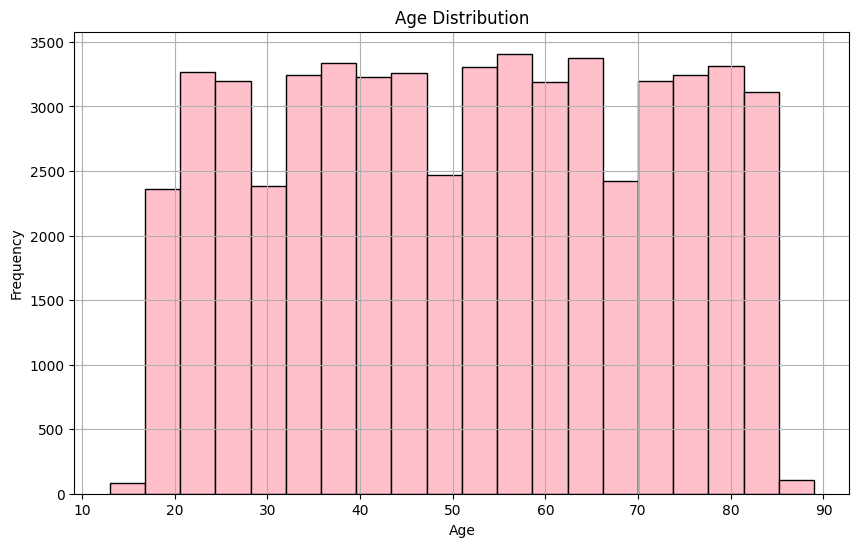

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, color='Pink', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## CountPlot for Gender

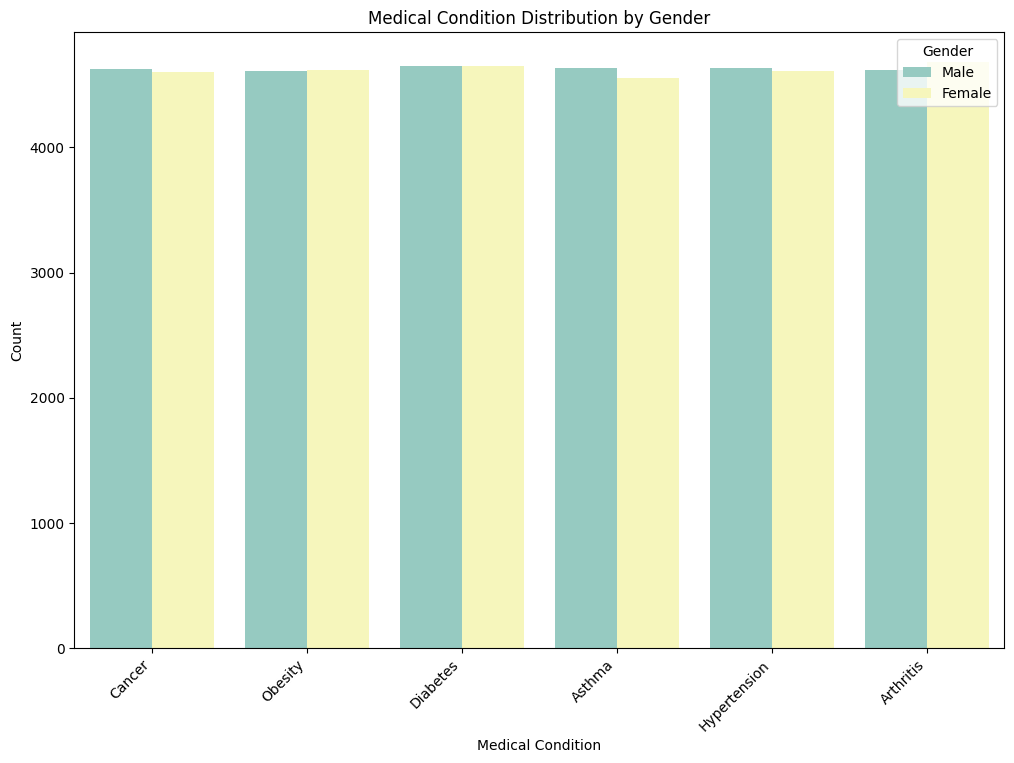

In [17]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Medical Condition', hue='Gender', palette='Set3')
plt.title('Medical Condition Distribution by Gender')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

## visualizing age distribution by Medical Condition

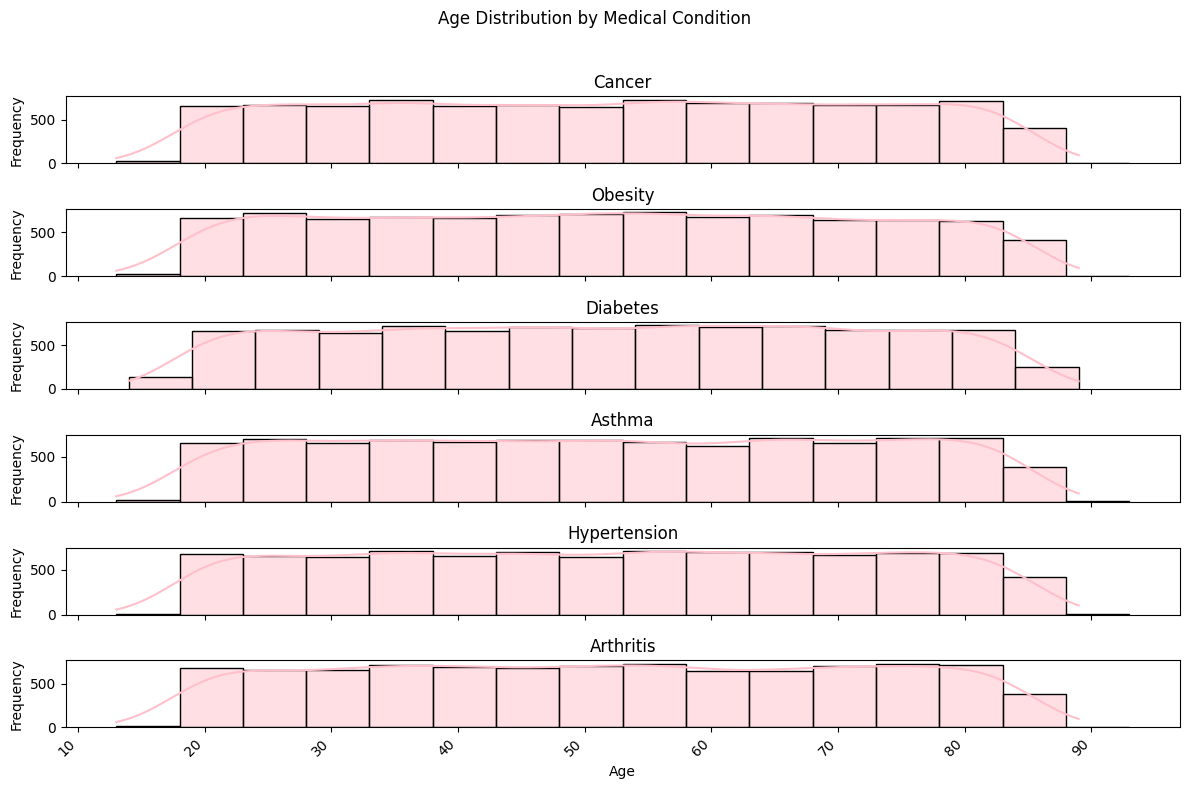

In [18]:
conditions = df['Medical Condition'].unique()

# Create subplots
fig, axes = plt.subplots(nrows=len(conditions), ncols=1, figsize=(12, 8), sharex=True)

# Plot each condition's age distribution in a separate subplot
for ax, condition in zip(axes, conditions):
    subset = df[df['Medical Condition'] == condition]
    sns.histplot(subset['Age'], ax=ax, kde=True,color='pink', binwidth=5)
    ax.set_title(condition)
    ax.set_ylabel('Frequency')

# Add common labels
fig.suptitle('Age Distribution by Medical Condition')
plt.xlabel('Age')
plt.xticks(rotation=45, ha='right')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the common title
plt.show()


In [19]:
## count plot for Test Results by Admission Type

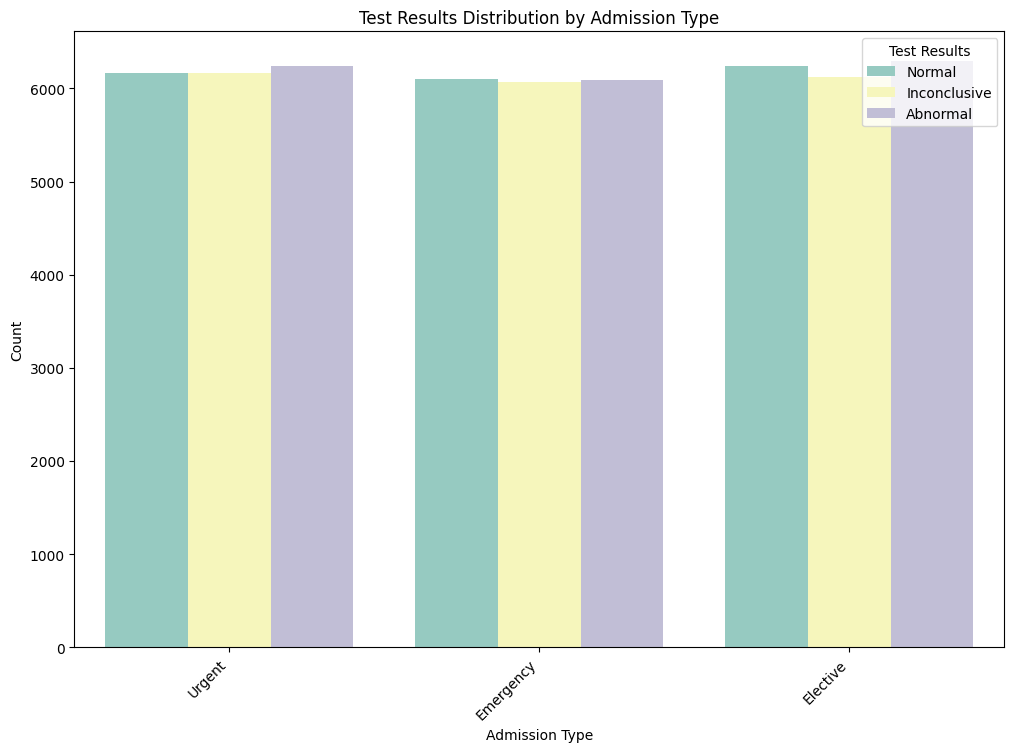

In [20]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Admission Type', hue='Test Results', palette='Set3')
plt.title('Test Results Distribution by Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

## Distribution Of each category in below feature

In [21]:
cols = ['Gender','Blood Type', 'Medical Condition',
        'Insurance Provider', 'Admission Type',
        'Medication', 'Test Results']

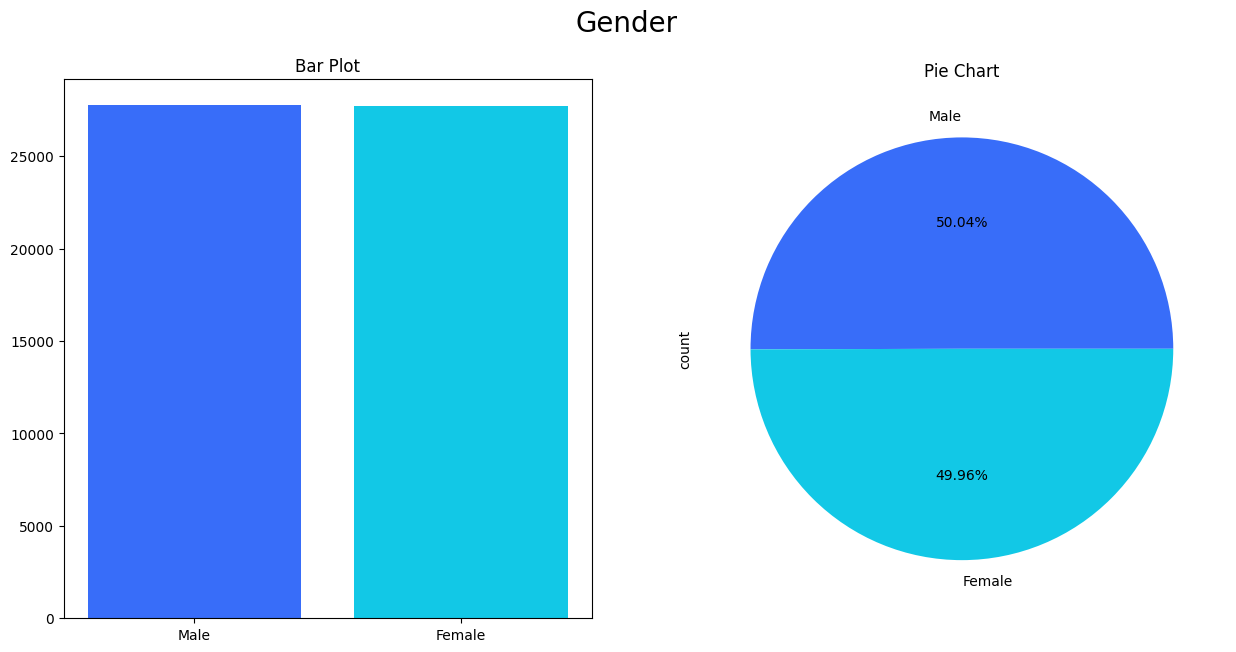

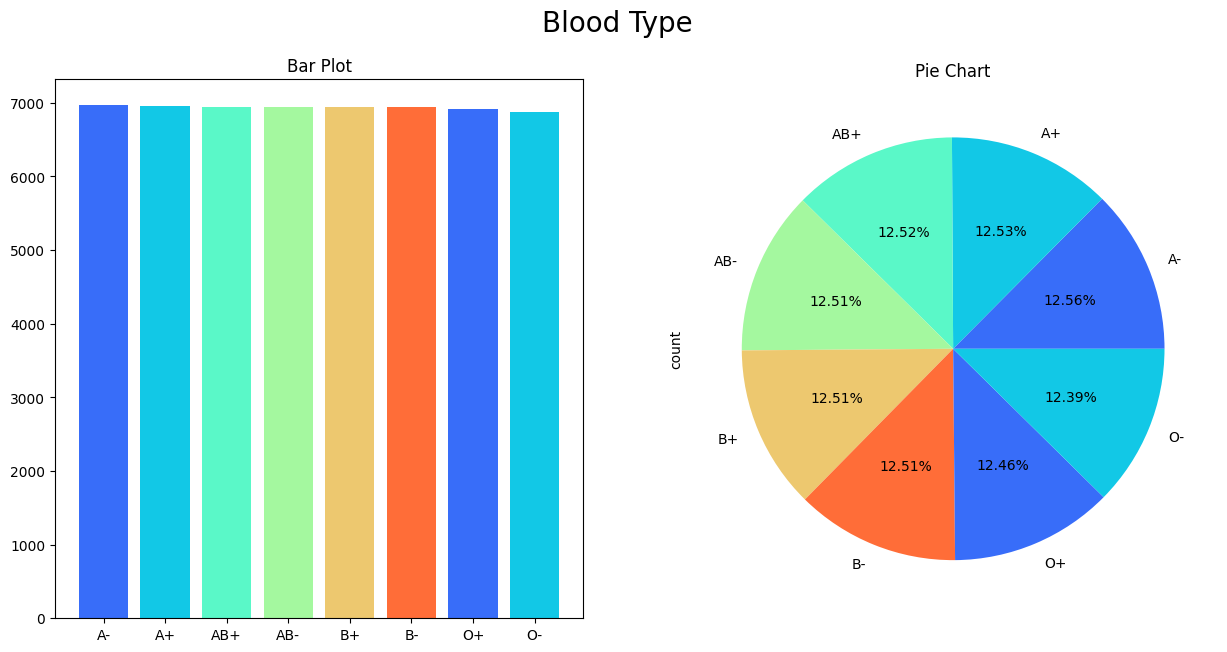

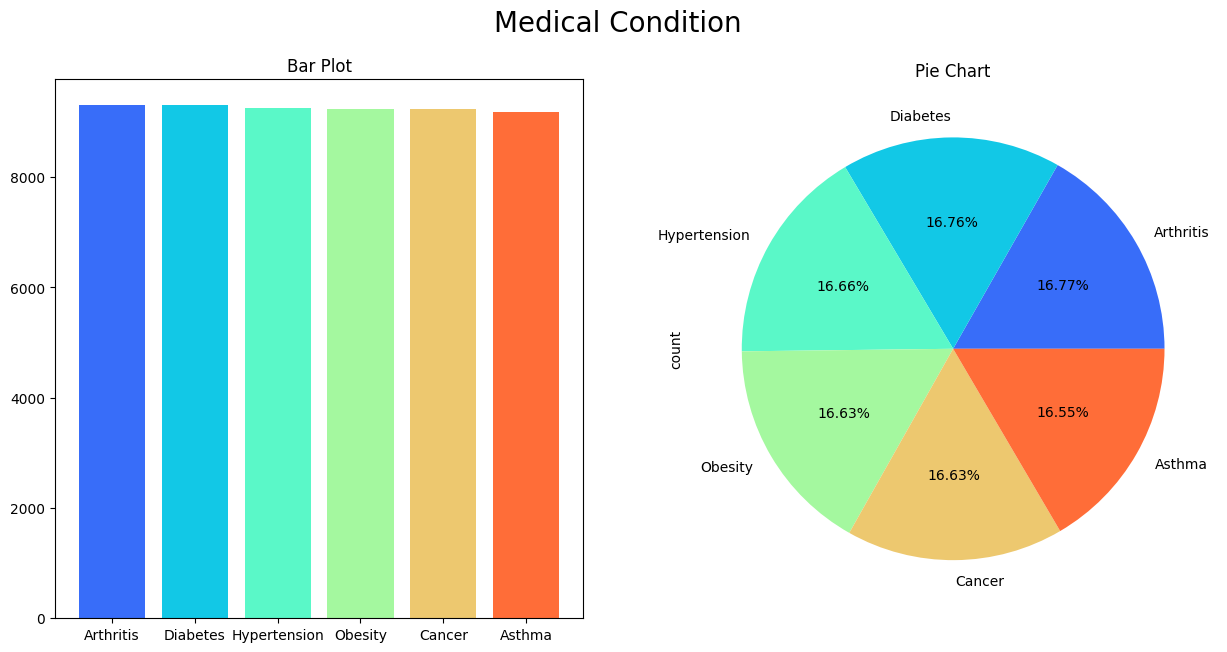

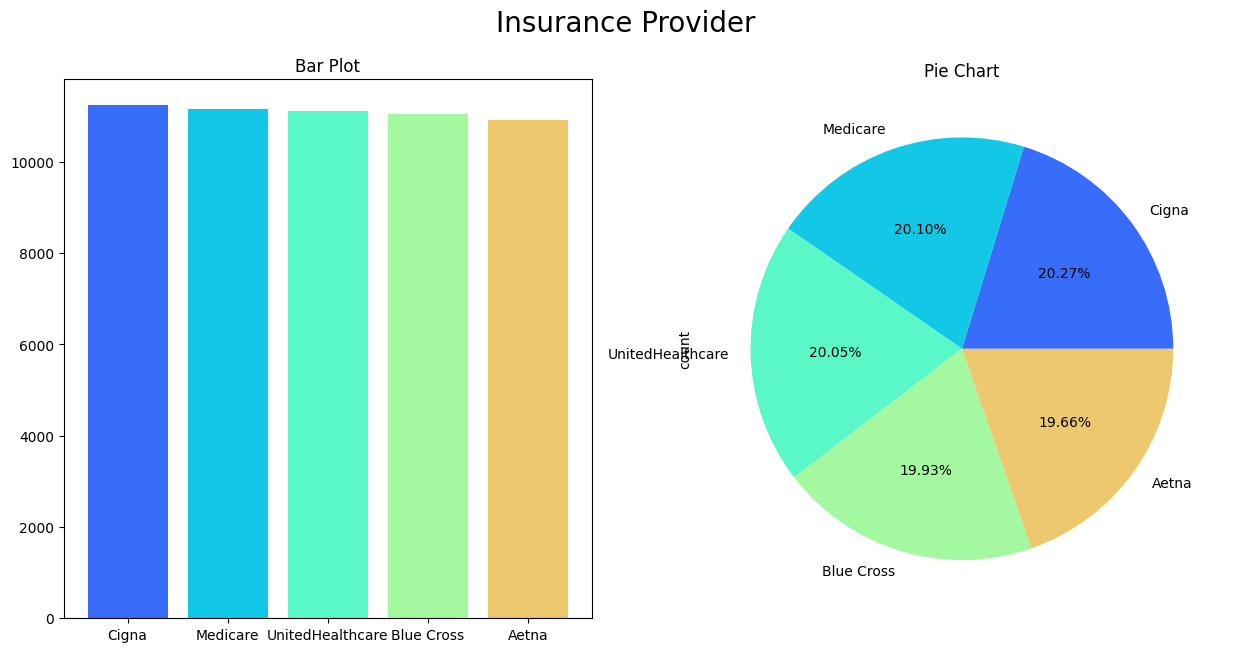

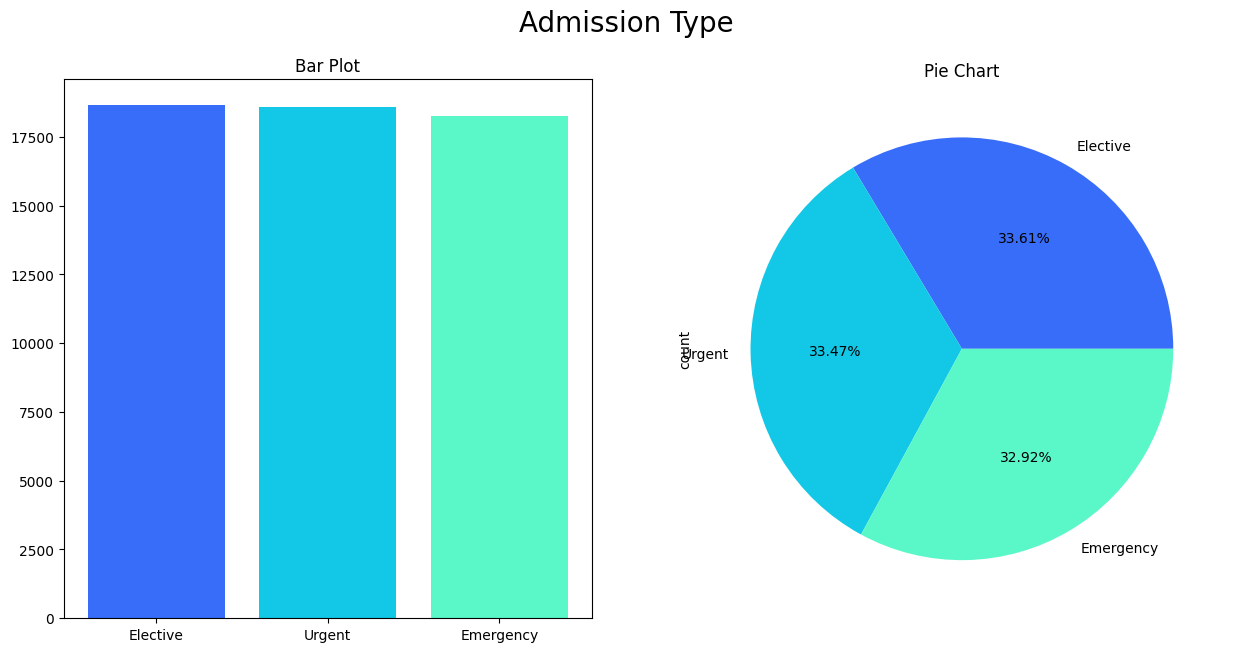

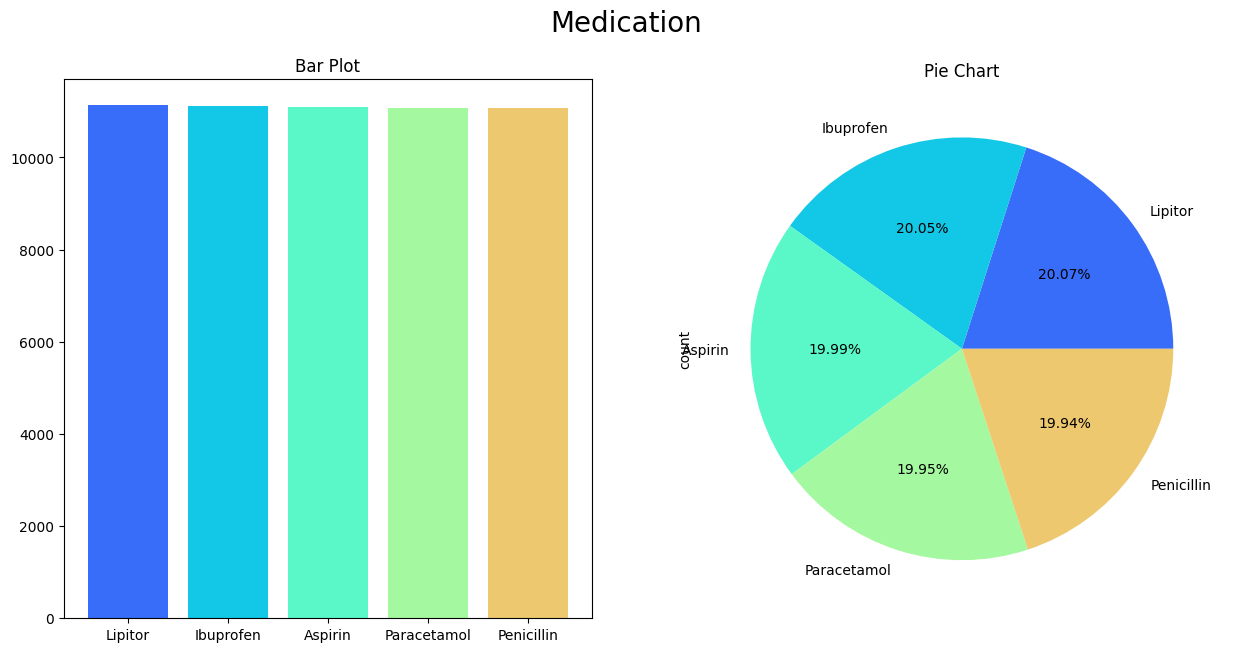

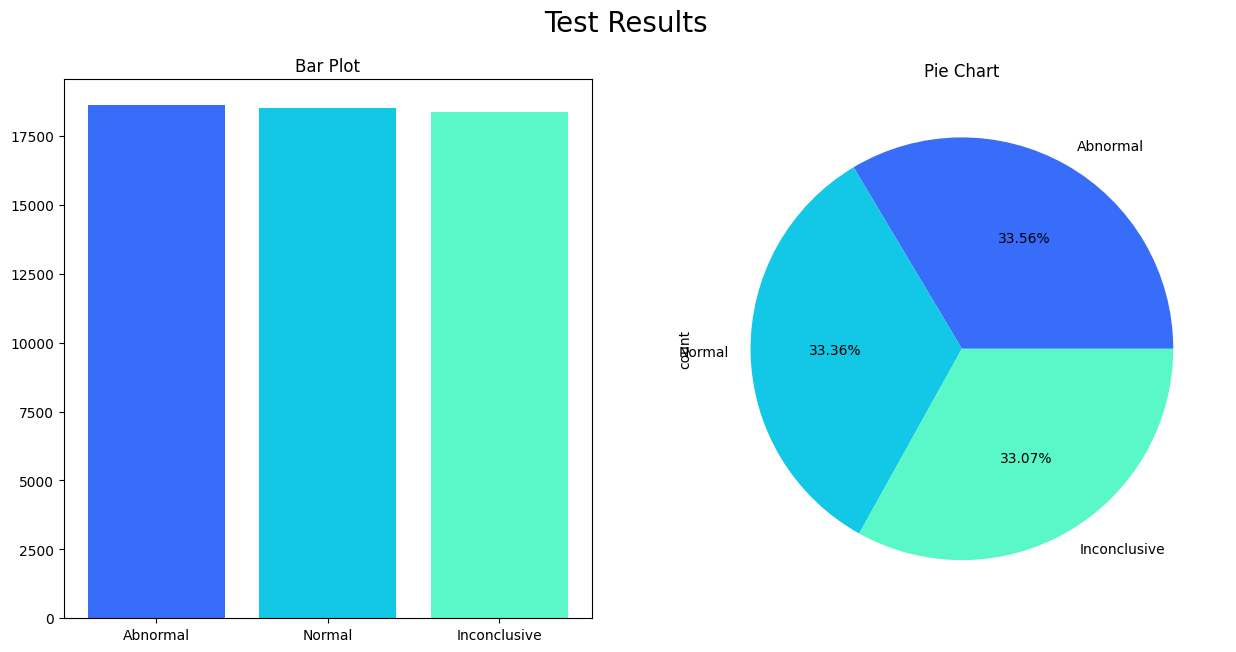

In [22]:
for i in cols:
    fig, ax = plt.subplots(1, 2, figsize=(15, 7))
    fig.suptitle(i, fontsize=20)
    
    ax[0].bar(df[i].value_counts().index, df[i].value_counts().values, color=sns.color_palette("rainbow"))
    ax[0].set_title('Bar Plot')
    
    df[i].value_counts().plot(kind='pie', autopct="%.2f%%", colors=sns.color_palette("rainbow"), ax=ax[1])
    ax[1].set_title('Pie Chart')
    
    plt.show()


## Billing Amount according to Medical Condition and Medication

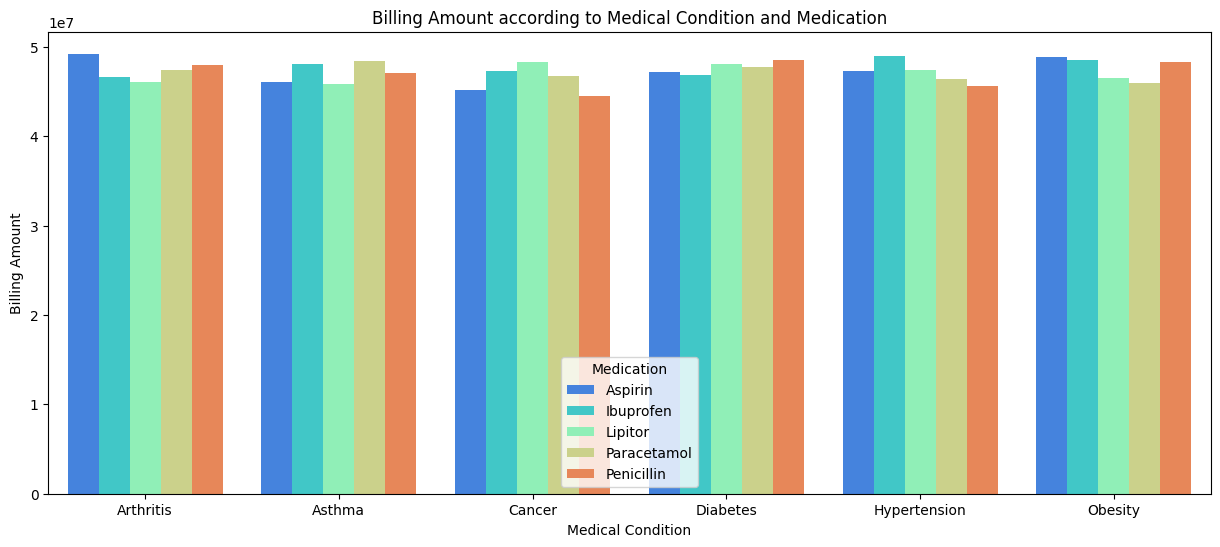

In [23]:
df_trans = df.groupby(['Medical Condition', 'Medication'])[['Billing Amount']].sum().reset_index()

plt.figure(figsize=(15,6))
sns.barplot(x=df_trans['Medical Condition'], y=df_trans['Billing Amount'], hue=df_trans['Medication'], palette="rainbow")
plt.title("Billing Amount according to Medical Condition and Medication")
plt.ylabel("Billing Amount")
plt.show()

## Billing Amount according to Medical Condition and Test Results

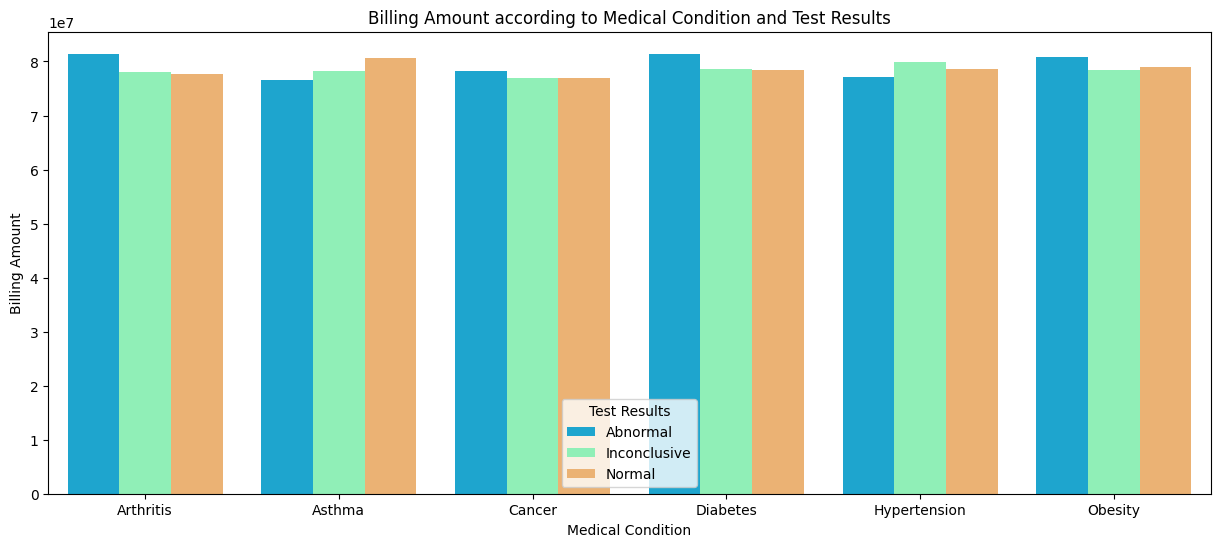

In [24]:
df_trans = df.groupby(['Medical Condition', 'Test Results'])[['Billing Amount']].sum().reset_index()

plt.figure(figsize=(15,6))
sns.barplot(x=df_trans['Medical Condition'], y=df_trans['Billing Amount'], hue=df_trans['Test Results'],palette="rainbow")
plt.title("Billing Amount according to Medical Condition and Test Results")
plt.ylabel("Billing Amount")
plt.show()

## How does the length of stay vary by medical condition?

In [25]:
# Calculating days hospitalized
df['Days hospitalized'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Days hospitalized
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,15
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,30
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,20


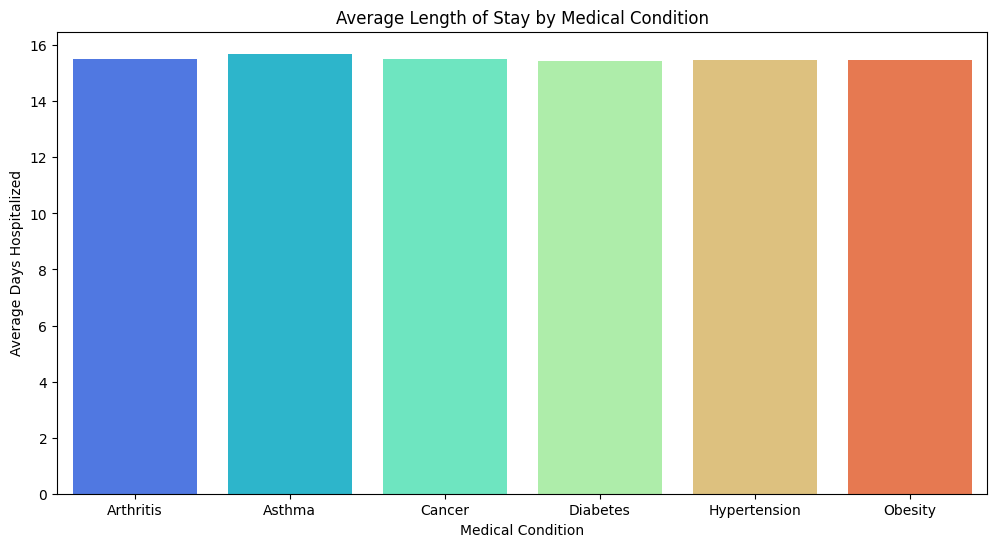

In [26]:
# Calculating average length of stay by medical condition
df_avg_stay = df.groupby('Medical Condition')['Days hospitalized'].mean().reset_index()

# Plot for average length of stay by medical condition
plt.figure(figsize=(12, 6))
sns.barplot(x='Medical Condition', y='Days hospitalized', data=df_avg_stay, palette="rainbow")
plt.title("Average Length of Stay by Medical Condition")
plt.xlabel("Medical Condition")
plt.ylabel("Average Days Hospitalized")
plt.show()

## What is the average age of patients in the dataset?

In [27]:
average_age = df['Age'].mean()
print(f"The average age of patients is {average_age:.2f} years.")

The average age of patients is 51.54 years.


## What is the most common medical condition among patients?

In [28]:
most_common_condition= df['Medical Condition'].value_counts().idxmax()
print(f"The most common medical conditions is {most_common_condition}.")

The most common medical conditions is Arthritis.


## Which doctors have the most number of admissions?

In [29]:
doctor_admissions = df['Doctor'].value_counts().idxmax()
print(f"Doctor with most admissions: {doctor_admissions}")

Doctor with most admissions: Michael Smith


## What is the distribution of patients across different hospitals

In [30]:
hospital_dist = df['Hospital'].value_counts()
print(f"Distribution of patientss across hospitals: {hospital_dist}")

Distribution of patientss across hospitals: Hospital
LLC Smith                      44
Ltd Smith                      39
Johnson PLC                    38
Smith Ltd                      37
Smith PLC                      36
                               ..
and Montoya Flores, Boyer       1
Carter and Dunn King,           1
Hall, Brown Black and           1
Peterson Scott and Thomas,      1
Moreno Murphy, Griffith and     1
Name: count, Length: 39876, dtype: int64


## How many unique hospitals are included in the dataset?

In [31]:
uniqueh = df['Hospital'].nunique()
print(f"Number of unique hospitals are {uniqueh}")

Number of unique hospitals are 39876


## Oldest patient Age

In [32]:
oldest_patient_age = df['Age'].max()
print(f"The oldest patient age is {oldest_patient_age} years.")

The oldest patient age is 89 years.


## Youngest Patient age

In [33]:
youngest_patient_age = df['Age'].min()
print(f"The youngest patient age is {youngest_patient_age} years.")

The youngest patient age is 13 years.


## most frequently prescribed medication?

In [34]:
most_frequent_medication = df['Medication'].value_counts().idxmax()
print(f"The most frequently prescribed medication is {most_frequent_medication}.")

The most frequently prescribed medication is Lipitor.


## How many male and female patients are there?

In [35]:
male_patients = df[df['Gender'] == 'Male'].shape[0]
female_patients = df[df['Gender'] == 'Female'].shape[0]
print(f"There are {male_patients} Male patients and {female_patients} Female patients.")

There are 27774 Male patients and 27726 Female patients.


## Top three most common medical conditions for which patients are admitted?

In [36]:
top_three = df['Medical Condition'].value_counts().head(3)
print("Top Three Most Common Medical Conditions:")
print(top_three)

Top Three Most Common Medical Conditions:
Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Name: count, dtype: int64


## Handling Categorical values

In [37]:
# function for Encoding Categorical values
'''
Ordering the labels according to the target.
Replacing the labels with joint Probability of being 1 or 0
'''

def encode_target_guided(df,feature,target):
    ordinal_labels=df.groupby([feature])[target].mean().sort_values().index
    enu = {k:i for i,k in enumerate(ordinal_labels,0)}
    df[feature+'_targuided']=df[feature].map(enu)
    # Drop the original feature
    df.drop(columns=[feature], inplace=True)

In [38]:
# label Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Medical Condition'] = encoder.fit_transform(df['Medical Condition'])

In [39]:
# function for selecting categorical features
catcol = []
for col in df.columns:
    if df[col].dtype == 'object':
        catcol.append(col)
print("Categorical Columns:",catcol)

Categorical Columns: ['Name', 'Gender', 'Blood Type', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Medication', 'Test Results']


In [40]:
# Encoding Categorical features
for col in catcol:
    encode_target_guided(df,col,'Medical Condition')

In [41]:
df.head()

,Age,Medical Condition,Date of Admission,Billing Amount,Room Number,Discharge Date,Days hospitalized,Name_targuided,Gender_targuided,Blood Type_targuided,Doctor_targuided,Hospital_targuided,Insurance Provider_targuided,Admission Type_targuided,Medication_targuided,Test Results_targuided
0,30,2,2024-01-31,18856.281306,328,2024-02-02,2,20616,1,6,20566,12808,3,0,0,2
1,62,5,2019-08-20,33643.327287,265,2019-08-26,6,49765,1,7,38659,27497,2,2,4,1
2,76,5,2022-09-22,27955.096079,205,2022-10-07,15,43762,0,4,34964,20363,4,2,1,2
3,28,3,2020-11-18,37909.782410,450,2020-12-18,30,31801,0,0,25630,21447,2,1,4,0
4,43,2,2022-09-19,14238.317814,458,2022-10-09,20,18591,0,5,13176,15094,4,0,2,0


## Dropping Useless features based on domain knowledge !!

In [42]:
# function for dropping features
def drop_features(df, features_to_drop):
    return df.drop(columns=features_to_drop, inplace=False)

In [43]:
features_to_drop = ['Discharge Date','Date of Admission','Name_targuided','Insurance Provider_targuided','Room Number','Hospital_targuided']
df = drop_features(df, features_to_drop)

In [44]:
df.head()

,Age,Medical Condition,Billing Amount,Days hospitalized,Gender_targuided,Blood Type_targuided,Doctor_targuided,Admission Type_targuided,Medication_targuided,Test Results_targuided
0,30,2,18856.281306,2,1,6,20566,0,0,2
1,62,5,33643.327287,6,1,7,38659,2,4,1
2,76,5,27955.096079,15,0,4,34964,2,1,2
3,28,3,37909.782410,30,0,0,25630,1,4,0
4,43,2,14238.317814,20,0,5,13176,0,2,0


## Getting count of each category in each feature

In [45]:
for col in df.columns:
    print(f"Counts for {col}:")
    print(df[col].value_counts())
    print()

Counts for Age:
Age
38    897
37    893
57    887
80    864
34    864
     ... 
88     25
16     24
14     18
13     14
89      8
Name: count, Length: 77, dtype: int64

Counts for Medical Condition:
Medical Condition
0    9308
3    9304
4    9245
5    9231
2    9227
1    9185
Name: count, dtype: int64

Counts for Billing Amount:
Billing Amount
8926.285937     2
50762.528342    2
24366.680481    2
14042.748908    2
18253.980486    2
               ..
43748.820505    1
8416.227513     1
25815.037193    1
20761.261421    1
40116.177618    1
Name: count, Length: 50000, dtype: int64

Counts for Days hospitalized:
Days hospitalized
21    1959
14    1909
20    1907
6     1903
11    1895
19    1890
7     1886
27    1884
30    1874
9     1868
29    1867
23    1866
25    1864
13    1864
4     1863
28    1853
2     1844
12    1843
3     1841
5     1832
8     1828
26    1819
18    1819
17    1818
1     1817
10    1802
15    1785
22    1784
24    1759
16    1757
Name: count, dtype: int64

Counts fo

## Scaling

In [46]:
numcol = []
for col in df.columns:
        numcol.append(col)
print(numcol)

['Age', 'Medical Condition', 'Billing Amount', 'Days hospitalized', 'Gender_targuided', 'Blood Type_targuided', 'Doctor_targuided', 'Admission Type_targuided', 'Medication_targuided', 'Test Results_targuided']


In [47]:
numcol = ['Age', 'Billing Amount', 'Days hospitalized', 'Gender_targuided', 'Blood Type_targuided', 'Test Results_targuided', 'Doctor_targuided', 'Admission Type_targuided', 'Medication_targuided']


scale = MinMaxScaler()

for col in numcol:
    df[[col]] = scale.fit_transform(df[[col]])

In [48]:
df.head()

,Age,Medical Condition,Billing Amount,Days hospitalized,Gender_targuided,Blood Type_targuided,Doctor_targuided,Admission Type_targuided,Medication_targuided,Test Results_targuided
0,0.223684,2,0.380933,0.034483,1.0,0.857143,0.509817,0.0,0.00,1.0
1,0.644737,5,0.650904,0.172414,1.0,1.000000,0.958329,1.0,1.00,0.5
2,0.828947,5,0.547053,0.482759,0.0,0.571429,0.866733,1.0,0.25,1.0
3,0.197368,3,0.728798,1.000000,0.0,0.000000,0.635350,0.5,1.00,0.0
4,0.394737,2,0.296622,0.655172,0.0,0.714286,0.326624,0.0,0.50,0.0


## Dropping the duplicate elements

In [49]:
df.drop_duplicates(inplace=True)

## Outlier Treatment

In [50]:
print("The length of data before outlier removal: {}".format(len(df)))

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Calculate the Interquartile Range (IQR) for each column
IQR = Q3 - Q1

# Filter out outliers
df_1 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print("The length of data after outlier removal: {}".format(len(df_1)))


The length of data before outlier removal: 54966
The length of data after outlier removal: 54966


## Plot for showing correlation

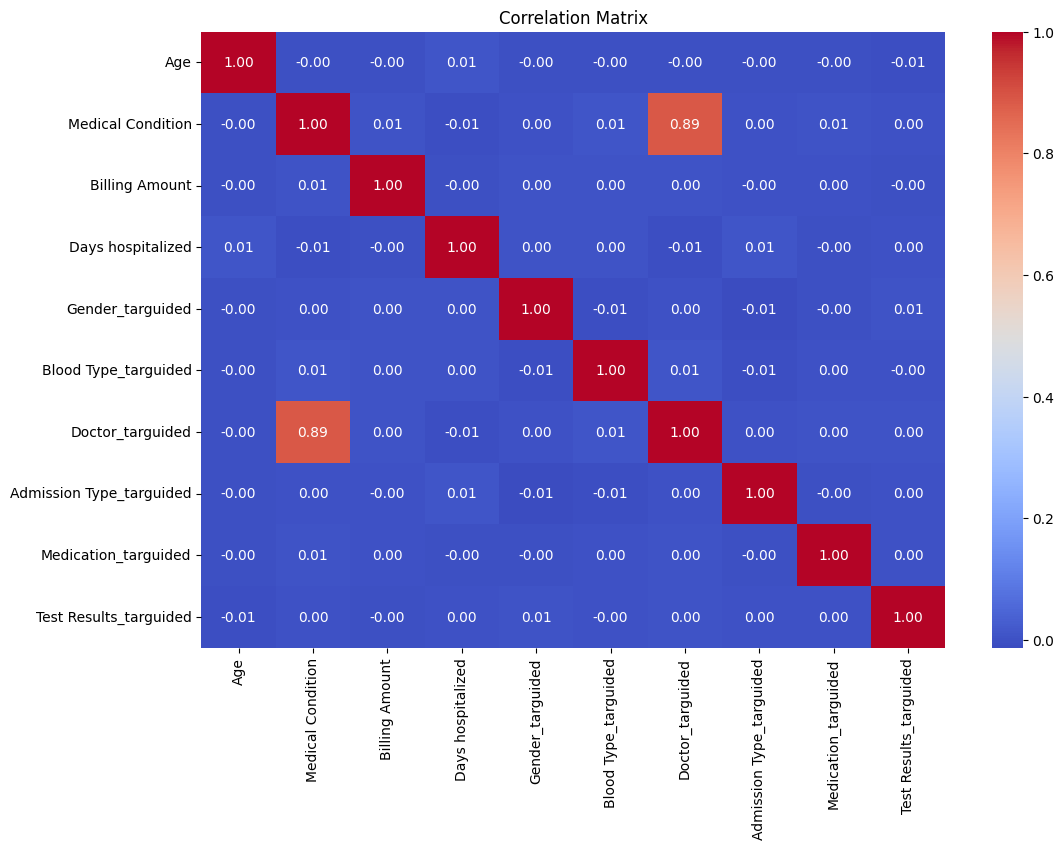

In [51]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [52]:
df.head()

,Age,Medical Condition,Billing Amount,Days hospitalized,Gender_targuided,Blood Type_targuided,Doctor_targuided,Admission Type_targuided,Medication_targuided,Test Results_targuided
0,0.223684,2,0.380933,0.034483,1.0,0.857143,0.509817,0.0,0.00,1.0
1,0.644737,5,0.650904,0.172414,1.0,1.000000,0.958329,1.0,1.00,0.5
2,0.828947,5,0.547053,0.482759,0.0,0.571429,0.866733,1.0,0.25,1.0
3,0.197368,3,0.728798,1.000000,0.0,0.000000,0.635350,0.5,1.00,0.0
4,0.394737,2,0.296622,0.655172,0.0,0.714286,0.326624,0.0,0.50,0.0


## Model Training And Evaluation

### Spliting X and Y

In [53]:
X = df.drop(columns='Medical Condition')
y = df['Medical Condition']

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=5,test_size=0.2)

###  Defining classification models And Evaluating

In [55]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    ExtraTreesClassifier(),
    XGBClassifier()
]

# Iterating over classification models
for model in models:
    # Fiting the model on training data
    model.fit(X_train, y_train)
    
    # Predicting on testing data
    y_pred = model.predict(X_test)
    
    # Calculating classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Printing results
    print(f"Model: {type(model).__name__}")
    print(f"Testing Accuracy: {accuracy * 100:.2f}%")
    print(f"Testing Precision: {precision * 100:.2f}%")
    print(f"Testing Recall: {recall * 100:.2f}%")
    print(f"Testing F1-score: {f1 * 100:.2f}%")
    print()


Model: LogisticRegression
Testing Accuracy: 64.53%
Testing Precision: 64.14%
Testing Recall: 64.53%
Testing F1-score: 64.23%

Model: DecisionTreeClassifier
Testing Accuracy: 73.45%
Testing Precision: 73.41%
Testing Recall: 73.45%
Testing F1-score: 73.42%

Model: RandomForestClassifier
Testing Accuracy: 80.05%
Testing Precision: 81.14%
Testing Recall: 80.05%
Testing F1-score: 80.29%

Model: GradientBoostingClassifier
Testing Accuracy: 77.86%
Testing Precision: 78.45%
Testing Recall: 77.86%
Testing F1-score: 78.01%

Model: ExtraTreesClassifier
Testing Accuracy: 79.08%
Testing Precision: 80.56%
Testing Recall: 79.08%
Testing F1-score: 79.39%

Model: XGBClassifier
Testing Accuracy: 78.33%
Testing Precision: 78.63%
Testing Recall: 78.33%
Testing F1-score: 78.41%



### Here we Selected Randomforestclassifier because of its best score among all !!

## HyperParameter Tuning Using RandomizedSearchCV

In [56]:
# Defining the model
rf = RandomForestClassifier()

# Seting up parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Instantiating RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                                   n_iter=50, cv=5, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42)

# Fitting RandomizedSearchCV
random_search.fit(X_train, y_train)

# Printing best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-validation Accuracy:", random_search.best_score_)

# Get the best model
best_rf = random_search.best_estimator_

# Evaluatating on test data
y_pred = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
print(f"Testing Precision: {precision * 100:.2f}%")
print(f"Testing Recall: {recall * 100:.2f}%")
print(f"Testing F1-score: {f1 * 100:.2f}%")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
Best Cross-validation Accuracy: 0.7971892045367126
Testing Accuracy: 79.83%
Testing Precision: 81.17%
Testing Recall: 79.83%
Testing F1-score: 80.12%


### Re-Training the model with best Parameters

In [57]:
best_params = {
    'n_estimators': 300,
    'max_depth': 30,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'sqrt'
}

# Instantiate RandomForestClassifier with best parameters
final = RandomForestClassifier(**best_params)

# Fitting the final model on the entire training data
final.fit(X_train, y_train)

# Predicting on test data
y_pred = final.predict(X_test)

# Evaluatating final model
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='weighted')
test_recall = recall_score(y_test, y_pred, average='weighted')
test_f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Testing Accuracy with final model: {test_accuracy * 100:.2f}%")
print(f"Testing Precision with final model: {test_precision * 100:.2f}%")
print(f"Testing Recall with final model: {test_recall * 100:.2f}%")
print(f"Testing F1-score with final model: {test_f1 * 100:.2f}%")

Testing Accuracy with final model: 79.77%
Testing Precision with final model: 81.05%
Testing Recall with final model: 79.77%
Testing F1-score with final model: 80.04%


In [58]:
print(final.predict([[0.223684,0.380933,0.034483,1.0,0.857143,0.509817,0.0,0.00,1.0]]))

[2]


## Function For Predicting The Actual Name Of Medical Condition

In [71]:
'''
In this implementation:

A function predict_with_names is defined that takes a trained model and a sample, performs the prediction, and 
maps the numeric prediction to the condition name.

This function is used to make the prediction and convert it to the condition name before printing it.
'''

condition_mapping = {
    0: 'Arthritis',
    1: 'Asthma',
    2: 'Cancer',
    3: 'Diabetes',
    4: 'HyperTension',
    5: 'Obesity'
}

def predict_with_names(model, sample):
    numeric_prediction = model.predict(sample)[0]
    condition_name = condition_mapping[numeric_prediction]
    return condition_name


In [72]:
sample = [[0.223684, 0.380933, 0.034483, 1.0, 0.857143, 0.509817, 0.0, 0.00, 1.0]]
prediction = predict_with_names(final, sample)

print(f"The predicted condition is: {prediction}")

The predicted condition is: Cancer
